# Model Project: Modelling imperfect competition

We choose to look at the Bertrand model and analyze the effects of adding firms to the traditional duopoly setting with different initial price levels. We also investigate a Cournot model to investigate the effect of relaxing the assumption of homogenous goods.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as BM
from modelproject import CournotNashEquilibriumSolver as Model
from types import SimpleNamespace
import ipywidgets as widgets

# Bertrand price model: Simple framework

**Model summary** 

To describe the model analytically  we will use a simple framework with two firms in a static environment. The firms produce homogenous goods and set prices simultaneously. Both firms are profit maximizing.

**Total demand**
$$q = D(p)$$ 

**Individual demand faced by firm i**

$$\begin{equation}
  D_i(p_i,p_j)= 
  \left\{
    \begin{array}{lrr}
      0 & \text{if  } p_i > p_j\\
      \cfrac{1}{2}D(p_i) & \text{if  }  p_i = p_j\\
      D(p_i) & \text{if  }  p_i < p_j
    \end{array}
  \right.
\end{equation}$$


**Profits:** 
The individual firm faces the profit function (c is marginal cost):
$$\begin{equation}
  \pi_i(p_i,p_j)= 
  \left\{
    \begin{array}{lrr}
      0 & \text{if  } p_i > p_j\\
      (p_i-c)\cfrac{1}{2}D(p_i) & \text{if  }  p_i = p_j\\
      (p_i-c)D(p_i)& \text{if  }  p_i < p_j
    \end{array}
  \right.
\end{equation}$$

**Normal form (Nash):** 

Firms/Players: $$I\equiv \{Firm1, Firm2\}$$

Strategy sets: $$S_i\equiv \mathbb{R}^+$$ 

Pay-offs: $\pi_i(p_i,p_j)$



# Dynamic game

We will implement successive best-responses for the firms. This means they will keep reacting to the best-response functions of one another until an equilibrium is reached. The Nash Equilibrium solves:

$$NE = \max_{a_i}\pi_i (a_i, s_j(a_i))$$

# Analytical solution 




## Using Sympy

### Bertrand Duopoly with products that are imperfect substitutes
We will now illustrate a solution to the Bertrand price competition model tweaking the setting such that firms supply imperfectly substituted products. Imperfect substitution between products imply that the firms can charge different prices without the high-price firm loosing the entire market to it's competitor. 


In [2]:
#Defining the parameters
q1, q2, qne = sm.symbols('q_1 q_2 q_NE')
p1, p2, pne = sm.symbols('p_1 p_2 p_NE')
a1, a2 = sm.symbols('a_1 a_2')
c = sm.symbols('c')
P1, P2 = sm.symbols('\Pi_1 \Pi_2')
NE = sm.symbols('NE')

In [3]:
#Defining the two firm demand functions:
Firm_1_Demand = sm.Eq(q1, a1-2*p1+p2)
Firm_2_Demand = sm.Eq(q2, a2+p1-2*p2)

#Displaying the demand functions:
print('Demand functions for Firm 1 and 2:')
display(Firm_1_Demand, Firm_2_Demand)

Demand functions for Firm 1 and 2:


Eq(q_1, a_1 - 2*p_1 + p_2)

Eq(q_2, a_2 + p_1 - 2*p_2)

In [4]:
#Defining firm profits:
Firm_1_Profit = sm.Eq(P1,p1*(a1-2*p1+p2)-c*(a1-2*p1+p2))
Firm_2_Profit = sm.Eq(P2,p2*(a2+p1-2*p2)-c*(a2+p1-2*p2))

#Displaying the profit functions:
print('Firm 1 and Firm 2s profit function: ')
display(Firm_1_Profit, Firm_2_Profit)

Firm 1 and Firm 2s profit function: 


Eq(\Pi_1, -c*(a_1 - 2*p_1 + p_2) + p_1*(a_1 - 2*p_1 + p_2))

Eq(\Pi_2, -c*(a_2 + p_1 - 2*p_2) + p_2*(a_2 + p_1 - 2*p_2))

In [5]:
#Calculating the FOC's:
FOC1 = sm.Eq(sm.diff(p1*(a1-2*p1+p2)-c*(a1-2*p1+p2),p1),0)
FOC2 = sm.Eq(sm.diff(p2*(a2+p1-2*p2)-c*(a2+p1-2*p2),p2),0)

#And displaying them:
print('FOCs: ')
display(FOC1, FOC2)

FOCs: 


Eq(a_1 + 2*c - 4*p_1 + p_2, 0)

Eq(a_2 + 2*c + p_1 - 4*p_2, 0)

In [6]:
#Isolating p_1 and p_2 respectively in the FOCs:
sol1 = sm.solve(FOC1, p1)
sol2 = sm.solve(FOC2, p2)

#Displaying them:
sol11 = sm.Eq(p1,sol1[0])
sol22 = sm.Eq(p2,sol2[0])
display(sol11, sol22)

Eq(p_1, a_1/4 + c/2 + p_2/4)

Eq(p_2, a_2/4 + c/2 + p_1/4)

The above are the reaction functions to the other firm's price, i.e. $p_1$ is the price that Firm 1 sets, when observing the price of Firm 2 and vice versa.

In [7]:
#Isolating p_1 in Firm 2s reaction function above:
reaction2_p1 = sm.solve(sol22, p1)

#Displaying it:
reaction22_p1 = sm.Eq(p1,reaction2_p1[0])
reaction22_p1

Eq(p_1, -a_2 - 2*c + 4*p_2)

We can now put Firm 1's reaction function equal to Firm 2's reaction function, such that we get the following expression:

$$\frac{a_1}{4}+\frac{c}{2}+\frac{p_2}{4}=-a_2-2c+4p_2,$$

where we from that can isolate $p_2$, which gives us the Nash-Equilibrium price set by Firm 2 (due to symmetry, this is also the NE-$p_1$):

In [8]:
#Setting Firm 1s rection function equal to Firm 2s rection function where p_1 is isolated (as illustrated above):
NE_p = sm.solve(sm.Eq(sol1[0],reaction2_p1[0]), p2)

#Displaying the Nash-Equilibrium price:
NE_p1p2 = sm.Eq(pne,NE_p[0])
NE_p1p2

Eq(p_NE, a_1/15 + 4*a_2/15 + 2*c/3)

We replace the $p_1$ and $p_2$ with $p_{NE}$ in Firm 1's demand function, which leaves us the Nash-Equilibrium quantity (for both firms due to symmetry).

In [9]:
#Inserting p_NE 
NE_q = sm.Eq(qne, a1-2*NE_p[0]+NE_p[0])
NE_q

Eq(q_NE, 14*a_1/15 - 4*a_2/15 - 2*c/3)

To conclude, we get the following Nash-Equilibrium:

In [10]:
NE_pq = sm.Eq(NE, sm.Eq((pne,qne), (NE_p[0], a1-2*NE_p[0]+NE_p[0])))
NE_pq

Eq(NE, Eq((p_NE, q_NE), (a_1/15 + 4*a_2/15 + 2*c/3, 14*a_1/15 - 4*a_2/15 - 2*c/3)))

We get a result where prices are not compeated down to marginal cost, as a result of inhomogeneus products. 

# Numerical solution when goods are perfect substitutes

We will now solve a Bertrand model numerically in a setting where goods are perfect substitutes. The expectation is that the equilibrium price will be equal to marginal cost for both firms, since a discrepancy in costs will mean that one firm captures the whole market. This gives the other firm an incentive to decrease price slighty below the one set by the firm with higher market share. This will continue until prices are equal to marginal costs.

We start of by offering the solution to the most simple setting where only two firms compete. After this follows a solution to setting with multiple firms, where each firm compete against it's nearest neighbour. 

### Solution to a setting with only two firms: 

In [29]:
# Finding demand plugging in baseline parameter values
demand_Q = BM.demand_Q(a=8, b=1, p_i=4, p_j=4)

# Finding profits
profit = BM.profit(p_i=4, p_j=4, c=2, demand_Q=demand_Q)

# Printing results
print(f'Quantity demanded equals {demand_Q} and profits for each firm is {profit}')

Quantity demanded equals 2.0 and profits for each firm is 2.0


### Solution to a setting with N competing firms:

We will now look at what happens when we increase the number of firms in the game while letting firms interact repetitively. All firms have information on the price of their nearest neighbor and therefor are in competition against only one other player. The expected result is that the price set by all firms will be successively adjusted toward the marginal cost (c). As seen in the plot below we see that firms successively decrease their inital prices until they reach an equlibrium where all prices equal marginal cost as expected.

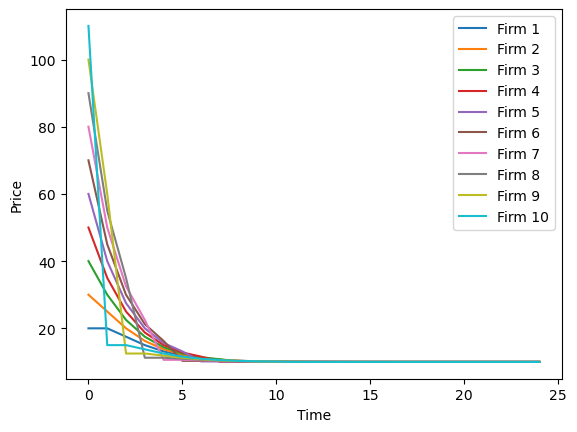

In [31]:
# Set the parameters: Can be adjusted
n_periods = 25  # Number of time periods
n_firms = 10    # Number of firms
mc = 10         # Marginal cost
q = 1000        # Market demand (inelastic)

# Set the initial prices
p = np.zeros((n_firms, n_periods))
p[:, 0] = np.arange(20, 20 + 10 * n_firms, 10)  # Initial prices with interval of 10


# Simulate the prices over time
for t in range(1, n_periods):
    for i in range(n_firms):
        # Calculate the competitor's price
        j = (i + 1) % n_firms
        competitor_price = p[j, t-1]
        
        # Calculate the firm's best response price
        p_i = (mc + competitor_price) / 2
        
        # Check if the price is within the feasible range
        if p_i > 0 and p_i < q:
            p[i, t] = p_i
        else:
            # If not, set the price to the midpoint of the feasible range
            p[i, t] = q / 2
    
# Plot the prices over time
for i in range(n_firms):
    plt.plot(p[i, :], label='Firm {}'.format(i+1))

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


As seen in the plot prices of all the firms in the game converge to the same price, namely the marginal cost, which is the same for all firms. Firms with a higher initially set price will adjust their prices accordingly at a higher rate than firms, who intially set their price closer to their marhinal cost. This is in line with the analytical predictions for the Bertrand Model.

# Further analysis: Cournot and Stackelberg duopoly

## Cournot Duopoly: 

To further investigate the effects of imperfect competition in different environments, we turn to the Cournot model where firms compete on quantities sold for consumption rather than on prices like in the Bertrand model. We will solve this model numerically for two firms. 

In a Cournot setting firms interact simultaneously in a static environment. We will relax this assumption later to see what happens if one firm has the role of a leader with information on the behaviour of the firm who acts last.

**Model summary**

To describe the Cournot model with two firms, we consider a static environment where both firms simultaneously choose quantities of a homogeneous good. Each firm aims to maximize its profit.

**Total demand**
$$q = D(p)$$

**Individual demand faced by firm i**
$$
D_i(q_i,q_j) = 
\begin{cases}
0 & \text{if } q_i + q_j > D^{-1}(q) \\
D(q_i) & \text{if } q_i + q_j \leq D^{-1}(q)
\end{cases}
$$

**Profits**
The profit function for firm i, given marginal cost c, is:
$$pi_i(q_i,q_j) = (p(q_i,q_j) - c)q_i$$

**Normal form (Nash)**
In the normal form representation of the game:

Firms/Players: 
$$I \equiv \{\text{Firm1, Firm2}\}$$

Strategy sets: 
$$S_i \equiv \mathbb{R}^+$$

Payoffs: 
$$\pi_i(q_i,q_j)$$

In this Cournot model, the firms choose quantities rather than prices, and each firm takes into account the impact of its own quantity on the market price through the demand function.


### Numerical solution to the simple model:

In [14]:
# Solution
solution = Model().solve_eq()  
print(f'The solution is (q_1, q_2) = {solution}')

The solution is (q_1, q_2) = [6.66666667 6.66666667]


### Solution to a setting with heterogenous cost functions:

Here we provide a numerical solution to Cournot Duopoly price competition. We include heterogenous cost functions for the firms in the model and investigate how the optimal production varies with the cost-function gap between the two firms. For this purpose we have inluded widgets in the visual representation of our results.

In [15]:
def plot(alpha = 1, beta = 1, Q = 20, c2= 0):
    model = Model()
    # rename model parameters
    model.par.alpha = alpha
    model.par.beta = beta
    model.par.X = Q
    model.par.c = [0, c2]
    # create an x axis grid
    range_c = np.arange(0,0.51,0.01)
    # create an y axis grid
    range_q = np.zeros((range_c.size,2))
    for it, i in enumerate(range_c):
        # save cost function for company 1
        model.par.c[0] = i
        # solve for equilibrium quantities
        range_q[it] = model.solve_eq()
    
    plt.plot(range_c, range_q[:, 1], color='Red', label='Good 1')
    plt.plot(range_c, range_q[:, 0], color='Green', label='Good 2')
    plt.ylabel('Quantity')
    plt.title('Nash Equilibirum for differentiated goods')
    plt.xlabel('Difference in cost')
    plt.legend()
    plt.show()
# plot()

def widget():
    widgets.interact(plot,
                
                 alpha=widgets.FloatSlider(
                     description="alpha", min=1, max=5, step=0.25, value=1),
                 beta=widgets.FloatSlider(
                     description="beta", min=1, max=5, step=0.25, value=1),
                 x0=widgets.FloatSlider(
                     description="Q", min=1, max=50, step=0.5, value=20),
                 c2=widgets.FloatSlider(
                     description="c2", min=0, max=5, step=0.1, value=0)

    );

widget()


interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.0, min=1.0, step=0.25), FloatSlider(va…

We conclude that that gap in optimal quantities varies with the cost-function gap between the firms as expected.

## Stackelberg duopoly: Incorporating non-simultaneous responses 

When firms do not have to act simultaneously, their responses may change. We investigate the effect on optimal quatitites produced when one firm acts as the leader in the game, while the other can act as a follower. The Cournot duopoly-setting will act as a starting point for this analysis: 

The game follows the structure: 
- Two firms decide on production quantities, $q_1$ and $q_2$
- First, $Firm_1$ chooses $q_1$ ("leader")
- Then, $Firm_2$ ("follower") observes this initial move and chooses own production, $q_2$
- The inverse demand functions and total quantities are given by: $P(Q) = a - Q$ and $Q = q_1 + q_2$
- Marginal costs are identical and constant at $c$


### Stage 1: 
$Firm_1$ sets quantity, $q_1$, with knowledge about the reaction function for $Firm_2$ ("follower"). Implicitly: $Firm_1$ knows what stage 2 of the game entails.

### Stage 2: 
$Firm_2$ reacts to the quantity produced by $Firm_1$. In practice, the quantity produced by $Firm_1$ is inserted in to the reaction function of the follower. Since $q_1$ is set, $Firm_2$ solves the following: 

$$\max_{q_2 \geq 0} = \pi_2(q_1, q_2) \iff \max_{q_2 \geq 0} = q_2 (a-(q_1 + q_2) - c)$$

Taking the FOC's will give us the following reaction function for $Firm_2$: 

$$R_2(q_1) = \cfrac{a-q_1 - c}{2}$$

### Stage 1: 
With information about this reaction function, Firm 1 can find the optimal quantity produced. The problem is solved analytically by $R_2(q_1)$ inserting in to the profit-maximization problem: 

$$\max_{q_1 \geq 0} \quad \pi_1(q_1, R_2(q_1)) \iff \max_{q_1 \geq 0} \quad q_1\left(a - \left(q_1 + \cfrac{a-q_1-c}{2}\right)-c\right)$$

### Expectation: 
If we compare our findings in the Stackelberg-setting with the equilibrium outcome from the simultaneous setting in the Cournot-model, we expect the leading firm to obtain higher profits and respectively larger quantities produced in optimum. This is a result of their informational advantage on the subsequent reaction of "the follower"-firm. 

Expectations for the output of the model are:

$$q_1*^{s} > q_1*^{c} \text{ and } q_2*^{s} < q_2*^{c} \text{ and } q_1*^{s} > q_2*^{s} $$

$$\pi_1*^{s} > \pi_1*^{c} \text{ and } \pi_2*^{s} < \pi_2*^{c} \text{ and } \pi_1*^{s} > \pi_2*^{s} $$

In sum: It is an advantage to be the market leader.

In [16]:
# Solving the model for 2 firms:
a = 10
c = 2
sol = BM.sol_stackelberg(a, c)
q_1 = sol[0]
q_2 = sol[1]
print(f'The quantity produced by the leader is {q_1}, while the quantity produced by the follower is {q_2}')

# Returning the total demand (willingness to pay at total quantity produced)
demand_P = BM.demand_P(a, q_1, q_2)
print(f'The willingness-to-pay for the total quantity produced of Q = q_1 + q_2 = {q_1 + q_2} is D_P = {demand_P}')

# Returning the profit for the leader and the follower
profit_1 = q_1*(demand_P-c)
profit_2 = q_2*(demand_P-c)

print(f'The profit for the leader is {profit_1} and the profit for the follower is {profit_2}')

The quantity produced by the leader is 4.0, while the quantity produced by the follower is 2.0
The willingness-to-pay for the total quantity produced of Q = q_1 + q_2 = 6.0 is D_P = 4.0
The profit for the leader is 8.0 and the profit for the follower is 4.0


The results for the Stackelberg model are as expected: The leader produces more than than the follower: 

$$q_1^* = 4 > q_2^* = 2$$

# Conclusion

We find that by modelling different types of price competition, namely Bertrand, Cournot and Stackelberg in a duopoly as well as an oligopoly setting we are able to replicate results that correspond to theoretical expectations. We do this by solving the models analytically after which we find the equilibrium outcomes using numerical optimizers.